$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Analysis and Prediction of Crimes in Chicago

## Overview

The goal of this project is to analyze the Chicago Crimes Dataset, classify the crimes and build a model that predicts the crime for 2017-2020.This project consists of three phases - Analyzing the dataset, Classifying the crimes, Building a prediction model.

For analysing the data, I have used the pandas package. The reason I chose pandas package is that it has built-in functionality for a lot of common data-processing applications: for example, easy groupby syntax, easy joins (which are really efficient in pandas), rolling windows, etc.

For Classifying the crimes and building a Prediction model, I have used LDA, linear regression and non-linear regression on the data and then analyzed the results to identify which algorithm works better.

### Table of Contents
* [Data](#Data)
* [Data Analysis](#Data-Analysis)
* [Classifying the Data](#Classifying-the-Data)
* [Prediction Model](#Prediction-Model)
   * [Linear Regression Model](#Linear-Regression-Model)
   * [Linear Ridge Regression Model](#Linear-Ridge-Regression-Model)
   * [Neural Networks Model](#Neural-Networks-Model)
* [Experimental Results](#Experimental-Results)
* [Conclusion](#Conclusion)
* [References](#References)


## Data

This dataset is taken from [Kaggle](https://www.kaggle.com/currie32/crimes-in-chicago) and reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to January,2017. The data is in the following form:

<table>
<tr>
<th> </th>
<th>ID</th>
<th>Case Number</th>
<th>Date</th>
<th>Block</th>
<th>IUCR</th>
<th>Primary Type</th>
<th>Description</th>
</tr>
<tr>
<td>388</td>
<td>4785</td>
<td>HP610824</td>
<td>10/07/2008
 12:39:00 PM</td>
<td>000XX E 75TH ST</td>
<td>0110</td>
<td>HOMICIDE</td>
<td>FIRST DEGREE MURDER</td>
</tr>
<tr>
<td>835</td>
<td>4786</td>
<td>HP616595</td>
<td>10/09/2008
 03:30:00 AM</td>
<td>048XX W POLK ST</td>
<td>0110</td>
<td>HOMICIDE</td>
<td>FIRST DEGREE MURDER</td>
</tr>
<tr>
<td>3</td>
<td>10508693</td>
<td>HZ250496</td>
<td>05/03/2016
 11:40:00 PM</td>
<td>013XX S SAWYER AVE</td>
<td>0486</td>
<td>BATTERY</td>
<td>DOMESTIC BATTERY SIMPLE</td>
</tr>
</table>


The dataset consists of 4 different files for crimes in 2001-2004, 2005-2007, 2008-2011,2011-2017 and has a size of 500MB. Since the data is really huge and has many attributes, it seems to be very interesting.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

Let's first load the 4 files.

In [2]:
crimes1_4 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
crimes1_4.head(5)

b'Skipping line 1513591: expected 23 fields, saw 24\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003,04/15/2016 08:55:02 AM,41.817229156,-87.637328162,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003,04/15/2016 08:55:02 AM,41.691784636,-87.635115968,"(41.691784636, -87.635115968)"


In [3]:
crimes5_7 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
crimes5_7.head(5)

b'Skipping line 533719: expected 23 fields, saw 24\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981912692,-87.771996382,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775732538,-87.611919814,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897392,-87.593670899,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984005,-87.780056951,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784210853,-87.71674491,"(41.784210853, -87.71674491)"


In [4]:
crimes8_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
crimes8_11.head(5)

b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758275857,-87.622451031,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.87025207,-87.746069362,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990476,-87.698901469,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894916924,-87.757358147,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826272,-87.709893465,"(41.843826272, -87.709893465)"


In [5]:
crimes12_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',index_col='Date')
crimes12_17.head(5)

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


Now as we have loaded all the files, let's try to analyze the data.

# Data Analysis

Let's first analyze the crimes from 2001-2004.

In [6]:
pt1_4 = crimes1_4[['Primary Type']]
crime_counts1_4 = pd.DataFrame(pt1_4.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)

In [7]:
crime_counts1_4

,Primary Type,counts
0,THEFT,395395
1,BATTERY,363538
2,CRIMINAL DAMAGE,220298
3,NARCOTICS,210600
4,OTHER OFFENSE,123753
5,ASSAULT,121417
6,BURGLARY,101902
7,MOTOR VEHICLE THEFT,98924
8,ROBBERY,70986
9,CRIMINAL TRESPASS,57770


From the above table we can see the top 10 crimes that occured in 2001-2004.

In [8]:
loc1_4 = crimes1_4[['Location Description']]
locations1_4 = pd.DataFrame(loc1_4.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)

In [9]:
locations1_4

,Location Description,counts
0,STREET,584118
1,RESIDENCE,349772
2,APARTMENT,144214
3,SIDEWALK,140802
4,OTHER,78132
5,PARKING LOT/GARAGE(NON.RESID.),59123
6,"SCHOOL, PUBLIC, BUILDING",44898
7,ALLEY,43061
8,RESIDENCE-GARAGE,38931
9,RESIDENCE PORCH/HALLWAY,34843


From this table we can say that maximum crimes have occured on the streets and residences.

Now let's analyze the crimes from 2005 to 2007, 2008 to 2011 and 2012 to 2017 in the similar way.

In [10]:
pt5_7 = crimes5_7[['Primary Type']]
crime_counts5_7 = pd.DataFrame(pt5_7.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
crime_counts5_7

,Primary Type,counts
0,THEFT,357555
1,BATTERY,341563
2,NARCOTICS,238514
3,CRIMINAL DAMAGE,231308
4,OTHER OFFENSE,114341
5,ASSAULT,110726
6,BURGLARY,103478
7,MOTOR VEHICLE THEFT,87014
8,ROBBERY,65920
9,CRIMINAL TRESPASS,61786


In [11]:
loc5_7 = crimes5_7[['Location Description']]
locations5_7 = pd.DataFrame(loc5_7.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
locations5_7

,Location Description,counts
0,STREET,504024
1,RESIDENCE,309498
2,SIDEWALK,207248
3,APARTMENT,178944
4,OTHER,68960
5,PARKING LOT/GARAGE(NON.RESID.),48154
6,"SCHOOL, PUBLIC, BUILDING",44648
7,ALLEY,44167
8,VEHICLE NON-COMMERCIAL,40344
9,RESIDENCE-GARAGE,38958


In [12]:
pt8_11 = crimes8_11[['Primary Type']]
crime_counts8_11 = pd.DataFrame(pt5_7.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
crime_counts8_11

,Primary Type,counts
0,THEFT,357555
1,BATTERY,341563
2,NARCOTICS,238514
3,CRIMINAL DAMAGE,231308
4,OTHER OFFENSE,114341
5,ASSAULT,110726
6,BURGLARY,103478
7,MOTOR VEHICLE THEFT,87014
8,ROBBERY,65920
9,CRIMINAL TRESPASS,61786


In [13]:
loc8_11 = crimes8_11[['Location Description']]
locations8_11 = pd.DataFrame(loc8_11.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
locations8_11

,Location Description,counts
0,STREET,683229
1,RESIDENCE,448949
2,SIDEWALK,306654
3,APARTMENT,304331
4,OTHER,91420
5,PARKING LOT/GARAGE(NON.RESID.),76409
6,ALLEY,61156
7,"SCHOOL, PUBLIC, BUILDING",58245
8,RESIDENCE-GARAGE,54941
9,RESIDENCE PORCH/HALLWAY,45650


In [14]:
pt12_17 = crimes12_17[['Primary Type']]
crime_counts12_17 = pd.DataFrame(pt12_17.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
crime_counts12_17

,Primary Type,counts
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289
5,OTHER OFFENSE,87874
6,BURGLARY,83397
7,DECEPTIVE PRACTICE,75495
8,MOTOR VEHICLE THEFT,61138
9,ROBBERY,57313


In [15]:
loc12_17 = crimes12_17[['Location Description']]
locations12_17 = pd.DataFrame(loc12_17.groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index()).head(10)
locations12_17

,Location Description,counts
0,STREET,330471
1,RESIDENCE,233530
2,APARTMENT,185023
3,SIDEWALK,160891
4,OTHER,55774
5,PARKING LOT/GARAGE(NON.RESID.),41768
6,ALLEY,31771
7,RESIDENTIAL YARD (FRONT/BACK),30645
8,SMALL RETAIL STORE,28803
9,"SCHOOL, PUBLIC, BUILDING",25959


Let us now compare the top crimes in these years.

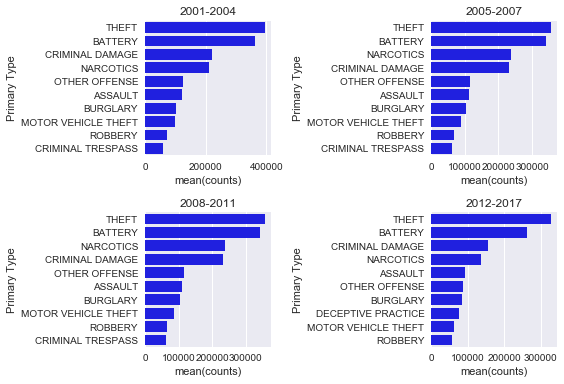

In [16]:
import seaborn as sns

# Initialize the matplotlib figure
plt.figure(figsize=(20,20))
f, ax = plt.subplots(2,2)

sns.barplot(x="counts", y="Primary Type", data=crime_counts1_4,
            label="Total", color="b",ax=ax[0][0])
ax[0][0].set_title("2001-2004")

sns.barplot(x="counts", y="Primary Type", data=crime_counts5_7,
            label="Total", color="b",ax=ax[0][1])
ax[0][1].set_title("2005-2007")

sns.barplot(x="counts", y="Primary Type", data=crime_counts8_11,
            label="Total", color="b",ax=ax[1][0])
ax[1][0].set_title("2008-2011")

sns.barplot(x="counts", y="Primary Type", data=crime_counts12_17,
            label="Total", color="b",ax=ax[1][1])
ax[1][1].set_title("2012-2017")

plt.tight_layout()

From the above plots we can see that Theft and Battery have been the top crimes in all these years and the number of Narcotics and Criminal Damage crimes are almost the same.

Let's now compare the locations at which the crimes take place.

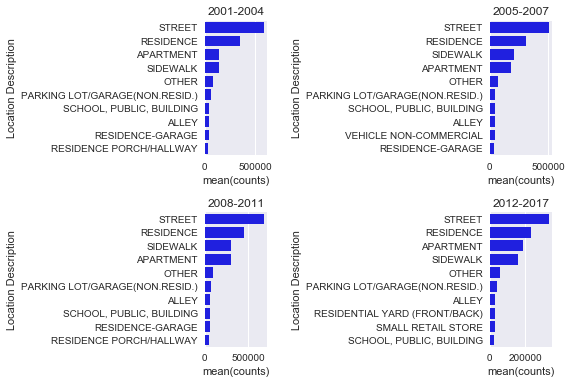

In [17]:
plt.figure(figsize=(30,30))
f, ax = plt.subplots(2,2)

sns.barplot(x="counts", y="Location Description", data=locations1_4,
            label="Total", color="b",ax=ax[0][0])
ax[0][0].set_title("2001-2004")

sns.barplot(x="counts", y="Location Description", data=locations5_7,
            label="Total", color="b",ax=ax[0][1])
ax[0][1].set_title("2005-2007")

sns.barplot(x="counts", y="Location Description", data=locations8_11,
            label="Total", color="b",ax=ax[1][0])
ax[1][0].set_title("2008-2011")

sns.barplot(x="counts", y="Location Description", data=locations12_17,
            label="Total", color="b",ax=ax[1][1])
ax[1][1].set_title("2012-2017")

plt.tight_layout()

The plots obtained look similar to the plot of types of crimes. Street and Residence remain in the top position for crimes and Residence and Sidewalk are almost similar.

Let's now compare the number of crimes with the number of arrests in these years.

In [18]:
crimesPerYear1_4 = pd.DataFrame(crimes1_4.groupby(['Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crimesPerYear1_4 = crimesPerYear1_4.head(4)
crimesPerYear1_4

,Year,Count
0,2001,568517
1,2002,490879
2,2003,475913
3,2004,388205


In [19]:
crimesPerYear5_7 = pd.DataFrame(crimes5_7.groupby(['Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crimesPerYear5_7

,Year,Count
0,2006,794684
1,2007,621848
2,2005,455811


In [20]:
crimesPerYear8_11 = pd.DataFrame(crimes8_11.groupby(['Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crimesPerYear8_11

,Year,Count
0,2008,852053
1,2009,783900
2,2010,700691
3,2011,352066


In [21]:
crimesPerYear12_17 = pd.DataFrame(crimes12_17.groupby(['Year']).size().sort_values(ascending=False).rename('Count').reset_index())
crimesPerYear12_17

,Year,Count
0,2012,335670
1,2013,306703
2,2014,274527
3,2016,265462
4,2015,262995
5,2017,11357


In [22]:
frames = [crimesPerYear1_4, crimesPerYear5_7, crimesPerYear8_11,crimesPerYear12_17]
result = pd.concat(frames)
result

,Year,Count
0,2001,568517
1,2002,490879
2,2003,475913
3,2004,388205
0,2006,794684
1,2007,621848
2,2005,455811
0,2008,852053
1,2009,783900
2,2010,700691


Lets now plot these values. We cannot directly plot the above obtained values since it is a DataFrame. So we first convert it to a numpy array and then plot the crime counts per year.

In [23]:
results = result.as_matrix(columns=[result.columns[:]])
results1 = results[:,:].astype(int)
results1 = results1[results1[:,0].argsort()]
results1

array([[  2001, 568517],
       [  2002, 490879],
       [  2003, 475913],
       [  2004, 388205],
       [  2005, 455811],
       [  2006, 794684],
       [  2007, 621848],
       [  2008, 852053],
       [  2009, 783900],
       [  2010, 700691],
       [  2011, 352066],
       [  2012, 335670],
       [  2013, 306703],
       [  2014, 274527],
       [  2015, 262995],
       [  2016, 265462],
       [  2017,  11357]])

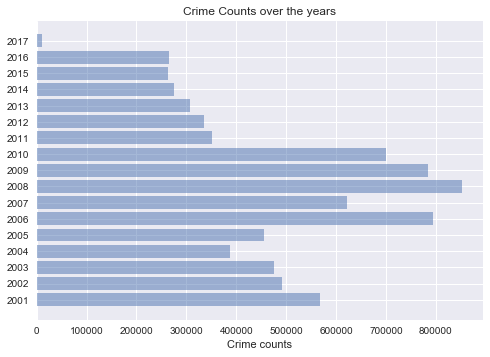

In [24]:
y_pos = np.arange(len(results1[:,0]))
plt.barh(y_pos, results1[:,1], align='center', alpha=0.5)
plt.yticks(y_pos, results1[:,0])
plt.xlabel('Crime counts')
plt.title('Crime Counts over the years')
 
plt.show()

From the above plot we can see that the crime rate has gradually decreased until 2004 and from 2005-2008, there were more crimes registered. From 2009, there is a decrease in the crime rate. 

2017 shows very less crime rate because the dataset consists of crimes registered till January, 2017 only.

Now let us try to analyze the number of arrests over these years.

In [25]:
#arrest_yearly = crimes1_4[crimes1_4['Arrest'] == True]['Arrest']
df = pd.DataFrame(crimes1_4, columns = ['Arrest', 'Year'])
df1 = df[df.Arrest == "True"]
arrestsPerYear1_4 = pd.DataFrame(df1.groupby(['Year']).size().sort_values(ascending=False).rename('ArrestCount').reset_index()).head(4)
arrestsPerYear1_4

,Year,ArrestCount
0,2001,167889
1,2002,142805
2,2003,141499
3,2004,116681


In [26]:
df = pd.DataFrame(crimes5_7, columns = ['Arrest', 'Year'])
df1 = df[df.Arrest == "True"]
arrestsPerYear5_7 = pd.DataFrame(df1.groupby(['Year']).size().sort_values(ascending=False).rename('ArrestCount').reset_index())
arrestsPerYear5_7

,Year,ArrestCount
0,2006,243781
1,2007,190131
2,2005,141159


In [27]:
df = pd.DataFrame(crimes8_11, columns = ['Arrest', 'Year'])
df1 = df[df.Arrest == "True"]
arrestsPerYear8_11 = pd.DataFrame(df1.groupby(['Year']).size().sort_values(ascending=False).rename('ArrestCount').reset_index())
arrestsPerYear8_11

,Year,ArrestCount
0,2009,221052
1,2008,219222
2,2010,191503
3,2011,96225


In [28]:
df = pd.DataFrame(crimes12_17, columns = ['Arrest', 'Year'])
df1 = df[df.Arrest == True]
df2 = df[df.Arrest == False]
arrestsPerYear12_17 = pd.DataFrame(df1.groupby(['Year']).size().sort_values(ascending=False).rename('ArrestCount').reset_index())
arrestsPerYear12_17

,Year,ArrestCount
0,2012,90511
1,2013,86219
2,2014,79057
3,2015,69397
4,2016,50386
5,2017,1902


Let's now plot these arrest counts against the crime counts.

In [29]:
frames = [arrestsPerYear1_4, arrestsPerYear5_7, arrestsPerYear8_11,arrestsPerYear12_17]
result = pd.concat(frames)
results = result.as_matrix(columns=[result.columns[:]])
results2 = results[:,:].astype(int)
results2 = results2[results2[:,0].argsort()]
results2

array([[  2001, 167889],
       [  2002, 142805],
       [  2003, 141499],
       [  2004, 116681],
       [  2005, 141159],
       [  2006, 243781],
       [  2007, 190131],
       [  2008, 219222],
       [  2009, 221052],
       [  2010, 191503],
       [  2011,  96225],
       [  2012,  90511],
       [  2013,  86219],
       [  2014,  79057],
       [  2015,  69397],
       [  2016,  50386],
       [  2017,   1902]])

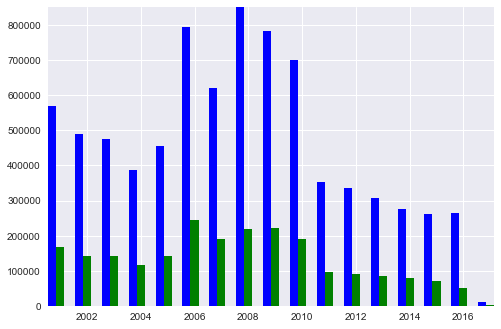

In [30]:
ax = plt.subplot(111)
w = 0.3
ax.bar(results2[:,0]-w, results1[:,1],width=w,color='b',align='center')
ax.bar(results2[:,0], results2[:,1],width=w,color='g',align='center')
ax.autoscale(tight=True)

plt.show()

From the above plots we can see that the number of arrests recorded in each year is very less compared to the number of crimes.

## Classifying the Data

Let us consider the Crimes data from 2012-2017 for classifying the data. Before we perform any operations on the data, let's first modify the data so that we have the Date as index. This would help us later when we try to predict the crimes.

In [31]:
crimes = crimes12_17.iloc[:, 3: ]
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [32]:
crimes.index = pd.to_datetime(crimes.index)
crimes.head(5)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


Now since we have the Date as index, lets start the classification of data. Before we classify the types of crimes, let's see how many types of crimes are there.

In [33]:
crime_counts12_17 = pd.DataFrame(pt12_17.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_counts12_17

,Primary Type,counts
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289
5,OTHER OFFENSE,87874
6,BURGLARY,83397
7,DECEPTIVE PRACTICE,75495
8,MOTOR VEHICLE THEFT,61138
9,ROBBERY,57313


From the above table we can see that there are about 32 Primary Types of crimes. Also we can see that some of the crimes can be classified as similar types. For example - Theft, Robbery, Motor Vehicle Theft and Burglary can be given the same label. Similarly we can consider Battery, Sex Offence, Crim Sexual Assualt can be considered as similar crimes.

Now lets try to classify the data by grouping similar items as below:

<table>
<tr>
<th>Categories</th>
<th>Label</th>
<th>Class</th>
</tr>
<tr>
<td>THEFT, BURGLARY, MOTOR VEHICLE THEFT, ROBBERY</td>
<td>THEFT</td>
<th>1</th>
</tr>
<tr>
<td>BATTERY, CRIM SEXUAL ASSAULT, SEX OFFENSE</td>
<td>SEXUAL ASSAULT</td>
<td>2</td>
</tr>
<tr>
<td>NARCOTICS, OTHER NARCOTIC VIOLATION</td>
<td>NARCOTICS</td>
<td>3</td>
</tr>
<tr>
<td>ASSAULT, INTIMIDATION</td>
<td>ASSAULT</td>
<td>4</td>
</tr>
<tr>
<td>OTHER OFFENSE</td>
<td>OTHER OFFENSE</td>
<td>5</td>
</tr>
<tr>
<td>DECEPTIVE PRACTICE</td>
<td>DECEPTIVE PRACTICE</td>
<td>6</td>
</tr>
<tr>
<td>CRIMINAL TRESPASS</td>
<td>CRIMINAL TRESPASS</td>
<td>7</td>
</tr>
<tr>
<td>WEAPONS VIOLATION, CONCEALED CARRY LICENSE VIOLATION</td>
<td>WEAPONS VIOLATION</td>
<td>8</td>
</tr>
<tr>
<td>PUBLIC INDECENCY, PUBLIC PEACE VIOLATION</td>
<td>PUBLIC INDECENCY</td>
<td>9</td>
</tr>
<tr>
<td>OFFENSE INVOLVING CHILDREN</td>
<td>OFFENSE INVOLVING CHILDREN</td>
<td>10</td>
</tr>
<tr>
<td>PROSTITUTION</td>
<td>PROSTITUTION</td>
<td>11</td>
</tr>
<tr>
<td>INTERFERENCE WITH PUBLIC OFFICER</td>
<td>INTERFERENCE WITH PUBLIC OFFICER</td>
<td>12</td>
</tr>
<tr>
<td>HOMICIDE</td>
<td>HOMICIDE</td>
<td>13</td>
</tr>
<tr>
<td>ARSON, CRIMINAL DAMAGE</td>
<td>ARSON</td>
<td>14</td>
</tr>
<tr>
<td>GAMBLING</td>
<td>GAMBLING</td>
<td>15</td>
</tr>
<tr>
<td>LIQUOR LAW VIOLATION</td>
<td>LIQUOR LAW VIOLATION</td>
<td>16</td>
</tr>
<tr>
<td>KIDNAPPING</td>
<td>KIDNAPPING</td>
<td>17</td>
</tr>
<tr>
<td>STALKING, OBSCENITY</td>
<td>STALKING</td>
<td>18</td>
</tr>
<tr>
<td>NON - CRIMINAL, NON-CRIMINAL (SUBJECT SPECIFIED)</td>
<td>NON - CRIMINAL</td>
<td>19</td>
</tr>
<tr>
<td>HUMAN TRAFFICKING</td>
<td>HUMAN TRAFFICKING</td>
<td>20</td>
</tr>
</table>

In this way we reduce 32 categories to 20 categories.

In [34]:
classifiedCrimes = crimes12_17.replace(['THEFT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY' ,'BATTERY', 'CRIM SEXUAL ASSAULT',
                                        'SEX OFFENSE' , 'NARCOTICS','OTHER NARCOTIC VIOLATION' , 'ASSAULT', 'INTIMIDATION' ,
                                        'OTHER OFFENSE' , 'DECEPTIVE PRACTICE' , 'CRIMINAL TRESPASS' , 'WEAPONS VIOLATION' , 
                                        'CONCEALED CARRY LICENSE VIOLATION','PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION',
                                        'OFFENSE INVOLVING CHILDREN','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','HOMICIDE',
                                        'ARSON', 'CRIMINAL DAMAGE','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING', 
                                        'OBSCENITY','NON - CRIMINAL','NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)','HUMAN TRAFFICKING']
                    ,[1,1,1,1,2,2,2,3,3,4,4,5,6,7,8,8,9,9,10,11,12,13,14,14,15,16,17,18,18,19,19,19,20])

In [35]:
primaryTypes = classifiedCrimes[['Primary Type']]
classifiedCrimeCounts = pd.DataFrame(primaryTypes.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())
classifiedCrimeCounts

,Primary Type,counts
0,1,531308
1,2,275408
2,14,157672
3,3,135270
4,4,91951
5,5,87874
6,6,75495
7,7,36912
8,8,17323
9,9,13184


Now since we have all the class labels, let us crop the data by taking only the necessary fields.

In [36]:
classifiedCrimes = classifiedCrimes[['Primary Type','Latitude','Longitude','Year']]

In [37]:
classifiedCrimes.head(10)

,Primary Type,Latitude,Longitude,Year
Date,,,,
05/03/2016 11:40:00 PM,2,41.864073,-87.706819,2016
05/03/2016 09:40:00 PM,2,41.782922,-87.604363,2016
05/03/2016 11:31:00 PM,9,41.894908,-87.758372,2016
05/03/2016 10:10:00 PM,2,41.885687,-87.749516,2016
05/03/2016 10:00:00 PM,1,41.886297,-87.761751,2016
05/03/2016 10:35:00 PM,2,41.745354,-87.603799,2016
05/03/2016 10:30:00 PM,2,41.844024,-87.626923,2016
05/03/2016 09:30:00 PM,2,41.811134,-87.620741,2016
05/03/2016 04:00:00 PM,2,41.998131,-87.665814,2016


Before we start building the prediction system, let's first remove all the missing values. Also in our prediction system, we would be predicting the crime based on the day of the week and the location. For this purpose we add another column to our data which corresponds to the day of the week.  

In [38]:
classifiedCrimes1 = classifiedCrimes.dropna(axis=0,how='any')

In [39]:
classifiedCrimes1.index = pd.to_datetime(classifiedCrimes1.index)

In [40]:
classifiedCrimes1.head(10)

,Primary Type,Latitude,Longitude,Year
Date,,,,
2016-05-03 23:40:00,2,41.864073,-87.706819,2016
2016-05-03 21:40:00,2,41.782922,-87.604363,2016
2016-05-03 23:31:00,9,41.894908,-87.758372,2016
2016-05-03 22:10:00,2,41.885687,-87.749516,2016
2016-05-03 22:00:00,1,41.886297,-87.761751,2016
2016-05-03 22:35:00,2,41.745354,-87.603799,2016
2016-05-03 22:30:00,2,41.844024,-87.626923,2016
2016-05-03 21:30:00,2,41.811134,-87.620741,2016
2016-05-03 16:00:00,2,41.998131,-87.665814,2016


In [41]:
classifiedCrimes1 = classifiedCrimes1.reset_index()
classifiedCrimes1['weekday'] = classifiedCrimes1['Date'].dt.dayofweek
classifiedCrimes1.head(10)

,Date,Primary Type,Latitude,Longitude,Year,weekday
0,2016-05-03 23:40:00,2,41.864073,-87.706819,2016,1
1,2016-05-03 21:40:00,2,41.782922,-87.604363,2016,1
2,2016-05-03 23:31:00,9,41.894908,-87.758372,2016,1
3,2016-05-03 22:10:00,2,41.885687,-87.749516,2016,1
4,2016-05-03 22:00:00,1,41.886297,-87.761751,2016,1
5,2016-05-03 22:35:00,2,41.745354,-87.603799,2016,1
6,2016-05-03 22:30:00,2,41.844024,-87.626923,2016,1
7,2016-05-03 21:30:00,2,41.811134,-87.620741,2016,1
8,2016-05-03 16:00:00,2,41.998131,-87.665814,2016,1
9,2016-05-03 22:30:00,2,41.768097,-87.663879,2016,1


Now we have enough data to build the prediction system.

## Prediction Model

To predict the crimes in the future years, we first need to train a model. There are many methods for building a model but we require an accurate method. So let's experiment with these methods to find the best model.

### Linear Regression Model

Linear Regression is an approach for modeling the relationship between a scalar dependent variable Y and one or more explanatory variables (or independent variables) denoted by X.

#### Method

The dataset is first loaded into a variable known as data and then we separate the Target values into T and the remaining data into X. Then we try to fit a linear model to all of the data to see how accurately we predict the residuary resistance for each sample. To do this we define three functions:
1. model = train(X,T)
2. predict = use(model,X)
3. error = rmse(predict,T)

In our case, the Target values are the crimes(Primary Type) and X consists of the latitude, longitude and weekday.




We first use the train method to find the weights of each of the attribute. This method returns a model which consists of the set of  keys < mean, standard deviation, weight>. 
To find weight matrix, we use the formula : 
$$
\begin{align*}
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

But the weight matrix we obtain is not standardized. So we first standardize the values by using the following formula and then applying the above formula

$$
\begin{align*}
\Xv &= \frac{\Xv - m }{s}
\end{align*}
$$

where, m is the mean ,
       s is the standard deviation.

In [42]:
import math
def train(X,T):
    means = np.mean(X,axis = 0)
    stds = np.std(X, axis = 0)
    Xs = (X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T))[0]
    return {'means':means, 'stds':stds, 'w':w}

Now we use this weight obtained from the above train() method in the use() method to get the predicted values of the model. In this method, we use the same mean and standard deviation as above.

In [43]:
def use(model, X):
    mean = model['means']
    std = model['stds']
    Xs = (X - mean) / std
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    new_w = model['w']
    predict = np.dot( Xs1,new_w )
    return predict

Now we take these predicted values and compare them with the Target values to find the error. We find the RMSE(Root Mean Square Error) for the Predicted values and the Target values using the following formula:

$$
\begin{align*}
rmse &= \sqrt{\frac{\sum_{n=1}^N (Predict - T)^2}{N}}
\end{align*}
$$

In [44]:
def rmse(predict, T):
    error = predict - T
    square = error ** 2
    mean = np.mean(square)
    root = np.sqrt(mean)
    return root

The RMSE value indicates the absolute fit of the model to the data – how close the observed data points are to the model’s predicted values.

#### Results

Let's first define the X and T matrices using classifiedCrimes1 dataFrame. Since this is a dataFrame, we first convert it to a numpy array so that we can slice it.

The matrix X should contain the Latitude, Longitude, Year and Weekday. T consists of the Primary Type(Crime)

In [45]:
CrimesData = classifiedCrimes1.as_matrix(columns=[classifiedCrimes1.columns[:]])

In [46]:
X = np.float64(CrimesData[:,2:6])
X

array([[  4.18640732e+01,  -8.77068186e+01,   2.01600000e+03,
          1.00000000e+00],
       [  4.17829215e+01,  -8.76043632e+01,   2.01600000e+03,
          1.00000000e+00],
       [  4.18949083e+01,  -8.77583720e+01,   2.01600000e+03,
          1.00000000e+00],
       ..., 
       [  4.17792347e+01,  -8.76852071e+01,   2.01600000e+03,
          1.00000000e+00],
       [  4.17452520e+01,  -8.75527735e+01,   2.01600000e+03,
          1.00000000e+00],
       [  4.17583087e+01,  -8.76206584e+01,   2.01600000e+03,
          1.00000000e+00]])

In [47]:
T = np.float64(CrimesData[:,1:2])
T

array([[ 2.],
       [ 2.],
       [ 9.],
       ..., 
       [ 2.],
       [ 2.],
       [ 5.]])

Let's now start training the model.

In [48]:
model = train(X, T)
predict = use(model, X)
error = rmse(predict, T)

In [49]:
error

4.1899398344628738

We can see that when we use linear regression to build our model, we got an error of 4.189

Let us try some more approaches to see if we can build a better model for our prediction system.

### Linear Ridge Regression Model

Ridge regression generally yields better predictions than ordinary least squares solution, through a better compromise between bias and variance. It reduces the sum of squared errors.

If we add a term to our sum of squared error objective function that is the sum of all weight magnitudes except the bias weight.  Then, we not only minimize the sum of squared errors, we also minimize the sum of the weight magnitudes:

$$ \sum_{i=1}^N (\tv_i - \xv_i^T \wv)^2 + \lambda \sum_{i=2}^N w_i^2$$

With $\lambda=0$ we have our usual linear regression objective function. With $\lambda>0$, we are adding in a penalty for the weight magnitudes. So we get the equation for weight as

$$ \wv = (X^T X + \lambda I)^{-1} X^T T $$

If we find the best value of $\lambda$ by comparing error on the test data, it will give us an optimistic prediction of error on novel data, because the test data was used to pick the best $\lambda$.

Instead of comparing the error only on test data, we partition the data into multiple ($k$) subsets called "folds". We select one fold to be the test partition, another fold to be the validate partition, and collect the remaining folds to be the train partition.  We can do this in $k\,(k-1)$ ways. In order to divide the data into partitions, we use the **partitionKFolds** algorithm.

#### Method

In [50]:
 def partitionKFolds(X,T,nFolds,shuffle=False,nPartitions=3):
    # Randomly arrange row indices
    rowIndices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(rowIndices)
    # Calculate number of samples in each of the nFolds folds
    nSamples = X.shape[0]
    nEach = int(nSamples / nFolds)
    if nEach == 0:
        raise ValueError("partitionKFolds: Number of samples in each fold is 0.")
    # Calculate the starting and stopping row index for each fold.
    # Store in startsStops as list of (start,stop) pairs
    starts = np.arange(0,nEach*nFolds,nEach)
    stops = starts + nEach
    stops[-1] = nSamples
    startsStops = list(zip(starts,stops))
    # Repeat with testFold taking each single fold, one at a time
    for testFold in range(nFolds):
        if nPartitions == 3:
            # Repeat with validateFold taking each single fold, except for the testFold
            for validateFold in range(nFolds):
                if testFold == validateFold:
                    continue
                # trainFolds are all remaining folds, after selecting test and validate folds
                trainFolds = np.setdiff1d(range(nFolds), [testFold,validateFold])
                # Construct Xtrain and Ttrain by collecting rows for all trainFolds
                rows = []
                for tf in trainFolds:
                    a,b = startsStops[tf]                
                    rows += rowIndices[a:b].tolist()
                Xtrain = X[rows,:]
                Ttrain = T[rows,:]
                # Construct Xvalidate and Tvalidate
                a,b = startsStops[validateFold]
                rows = rowIndices[a:b]
                Xvalidate = X[rows,:]
                Tvalidate = T[rows,:]
                # Construct Xtest and Ttest
                a,b = startsStops[testFold]
                rows = rowIndices[a:b]
                Xtest = X[rows,:]
                Ttest = T[rows,:]
                # Return partition matrices, then suspend until called again.
                yield Xtrain,Ttrain,Xvalidate,Tvalidate,Xtest,Ttest,testFold
        else:
            # trainFolds are all remaining folds, after selecting test and validate folds
            trainFolds = np.setdiff1d(range(nFolds), [testFold])
            # Construct Xtrain and Ttrain by collecting rows for all trainFolds
            rows = []
            for tf in trainFolds:
                a,b = startsStops[tf]                
                rows += rowIndices[a:b].tolist()
            Xtrain = X[rows,:]
            Ttrain = T[rows,:]
            # Construct Xtest and Ttest
            a,b = startsStops[testFold]
            rows = rowIndices[a:b]
            Xtest = X[rows,:]
            Ttest = T[rows,:]
            # Return partition matrices, then suspend until called again.
            yield Xtrain,Ttrain,Xtest,Ttest,testFold

We define a new train method for ridge regression which consists of another parameter lambda. The use and rmse methods are same as we have used in linear regression.

In [51]:
def train(X,T,lamb):
    means = np.mean(X,axis = 0)
    stds = np.std(X, axis = 0)
    Xs = (X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T))[0]
    means = X.mean(0)
    stds = X.std(0)
    n,d = X.shape
    Xs1 = np.insert( (X - means)/stds, 0, 1, axis=1)
    lambDiag = np.eye(d+1) * lamb
    lambDiag[0,0] = 0
    w = np.linalg.lstsq( np.dot(Xs1.T,Xs1) + lambDiag, np.dot(Xs1.T,T))[0]
    return {'w': w, 'means':means, 'stds':stds}

def use(X,model):
    Xs1 = np.insert((X-model['means'])/model['stds'], 0, 1, axis=1)
    return np.dot(Xs1,model['w'])

def rmse(A,B):
    return np.sqrt(np.mean( (A-B)**2 ))

Now since we have all the required methods, lets start testing which lambda value gives the best results.

#### Results

We need to determine which lamba value gives the bestresults for how many number of folds. To do this lets define a method which takes a set of lamba values and the number of folds as input and tells which one gives the best results.

In [52]:
def multipleLambdas(X, T, nFolds, lambdas):
    foldCount = 0
    results = []
    for Xtrain,Ttrain,Xval,Tval,Xtest,Ttest,_ in partitionKFolds(X,T,nFolds,True):
        for lamb in lambdas:
            model = train(Xtrain,Ttrain,lamb)
            predict = use(Xval,model)
            results.append([foldCount,lamb,rmse(use(Xtrain,model),Ttrain),rmse(use(Xval,model),Tval),rmse(use(Xtest,model),Ttest)])
        foldCount +=1
    results = np.array(results)
    bestresults = []  
    for i in range(foldCount):
        FCRow = np.take(results,(np.where(results[:,0:1] == i))[0], axis =0)
        minRow = np.where(results[:,3:4] == (np.amin(FCRow[:,3:4],axis=0)))[0]
        bestresults.append(np.take(results,minRow,axis=0))
    bestresults = np.array(bestresults)
    bestresults = bestresults.reshape(bestresults.shape[0], bestresults.shape[2])
    return bestresults

Let's now start experimenting with these methods.

In [53]:
lambdas = [0,1,2,3,4,5]
bestresults = multipleLambdas(X,T,4,lambdas)
bestresults

array([[  0.        ,   5.        ,   4.19106824,   4.19931631,
          4.17828606],
       [  1.        ,   0.        ,   4.19283109,   4.19583199,
          4.17841756],
       [  2.        ,   5.        ,   4.19750845,   4.18644035,
          4.17829108],
       [  3.        ,   0.        ,   4.19106824,   4.17828605,
          4.19931631],
       [  4.        ,   0.        ,   4.1823474 ,   4.19572104,   4.1993355 ],
       [  5.        ,   5.        ,   4.18693641,   4.18664019,
          4.19951077],
       [  6.        ,   0.        ,   4.19283109,   4.17841756,
          4.19583199],
       [  7.        ,   5.        ,   4.1823474 ,   4.1993355 ,
          4.19572105],
       [  8.        ,   5.        ,   4.18880785,   4.18643882,
          4.19570565],
       [  9.        ,   0.        ,   4.19750845,   4.17829107,
          4.18644036],
       [ 10.        ,   5.        ,   4.18693641,   4.19951077,
          4.18664019],
       [ 11.        ,   0.        ,   4.18880785,  

We can see that the least validation error obtained is 4.184 when we have 4 folds and when $\lambda=0$ . This value is almost same as the error obtained when we used linear regression model. Let's try by increasing the number of folds and for a different set of lambda values.

In [54]:
lambdas = [0,5,10,15,20]
bestresults = multipleLambdas(X,T,5,lambdas)
bestresults

array([[  0.        ,   0.        ,   4.19319178,   4.1918452 ,   4.178282  ],
       [  1.        ,  20.        ,   4.19311319,   4.19218344,
          4.17844169],
       [  2.        ,  20.        ,   4.19240089,   4.1941981 ,
          4.17833768],
       [  3.        ,   0.        ,   4.19263813,   4.19353027,
          4.17827784],
       [  4.        ,  20.        ,   4.19319178,   4.17828198,
          4.19184524],
       [  5.        ,  20.        ,   4.18863748,   4.19199806,
          4.19183347],
       [  6.        ,   0.        ,   4.1878837 ,   4.1941966 ,
          4.19189496],
       [  7.        ,   0.        ,   4.18808521,   4.1936636 ,   4.1919753 ],
       [  8.        ,  20.        ,   4.19311319,   4.17844169,
          4.19218344],
       [  9.        ,   0.        ,   4.18863748,   4.19183343,   4.1919981 ],
       [ 10.        ,  20.        ,   4.18783946,   4.19420929,
          4.19208591],
       [ 11.        ,   0.        ,   4.18809202,   4.19348389,
   

We can see that the least validation error in this case is 4.185 and is obtained for 5 folds with lambda value 20. Lets try to increase the lambda values and see if we get better results.

In [55]:
lambdas = [5,20,40,50,100]
bestresults = multipleLambdas(X,T,5,lambdas)
bestresults

array([[   0.        ,    5.        ,    4.18945321,    4.19655789,
           4.1848421 ],
       [   1.        ,    5.        ,    4.19257981,    4.18717528,
           4.18482075],
       [   2.        ,    5.        ,    4.19157768,    4.19021195,
           4.18487099],
       [   3.        ,  100.        ,    4.19127785,    4.19114484,
           4.18475766],
       [   4.        ,    5.        ,    4.18945321,    4.1848421 ,
           4.19655789],
       [   5.        ,  100.        ,    4.18865631,    4.18718725,
           4.19654688],
       [   6.        ,    5.        ,    4.1876627 ,    4.19018839,
           4.19656409],
       [   7.        ,  100.        ,    4.1873334 ,    4.19124626,
           4.19655748],
       [   8.        ,    5.        ,    4.19257981,    4.18482075,
           4.18717528],
       [   9.        ,    5.        ,    4.18865631,    4.19654685,
           4.18718727],
       [  10.        ,    5.        ,    4.19078993,    4.19016853,
           4

The least validation error obtained in this case is 4.185 for $\lambda=5$ which is almost the same as linear regression method.

Let's try using the neural networks for building the model and see if yeilds better results.

### Neural Networks Model

A neural network can be thought of as a network of “neurons” organised in layers. The predictors (or inputs) form the bottom layer, and the forecasts (or outputs) form the top layer.

#### Method

I have use two methods - **trainNN** and **evaluateNN** for training and evaluating the neural network model. In the trainNN method, we first create an object nnet of the NeuralNetwork class and then we train it for different iterations. This method returns the nnet object. The evaluate method takes this nnet object and uses it to get the predicted model and then we compute the error.

In [56]:
from neuralnetworks import NeuralNetwork as nn

In [57]:
def trainNN(X,T, parameters):
    nnet = nn(X.shape[1], parameters[0], T.shape[1])
    nnet.train(X,T, nIterations=parameters[1], verbose=False)
    return {'net': nnet}

In [58]:
def evaluateNN(model,X,T):
    nnet = model['net']
    predict = nnet.use(X)
    return np.sqrt(np.mean( (predict-T)**2 ))

Similar to the above method, we define a **trainValidateTestKFolds** method which returns the following:

1. the best parameter with number of hidden layers and iterations(hidden layers in case of neural networks)
2. the best parameter values with the training error
3. the mean of the validation error
4. the testing error.

In [59]:
def trainValidateTestKFolds(X,T,parameterSets,nFolds,
                            shuffle=False,verbose=False):
    # Randomly arrange row indices
    rowIndices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(rowIndices)
    # Calculate number of samples in each of the nFolds folds
    nSamples = X.shape[0]
    nEach = int(nSamples / nFolds)
    if nEach == 0:
        raise ValueError("partitionKFolds: Number of samples in each fold is 0.")
    # Calculate the starting and stopping row index for each fold.
    # Store in startsStops as list of (start,stop) pairs
    starts = np.arange(0,nEach*nFolds,nEach)
    stops = starts + nEach
    stops[-1] = nSamples
    startsStops = list(zip(starts,stops))
    # Repeat with testFold taking each single fold, one at a time
    results = []
    # For each test fold
    for testFold in range(nFolds):
        #initializing bestMean to infinity
        bestMean = float("inf")
         # For each set of parameter values, called parmSet
        for paramset in parameterSets:
            # Find best set of parameter values
            # For each validate fold (except when same as test fold)
            sum = 0
            for validateFold in range(nFolds):
                #Checking if it is same as test fold so 
                if testFold == validateFold:
                    continue
                #After selecting test and validate, the remaining are trainFolds
                #so we subtract the test and validate folds from other folds
                trainFolds = np.setdiff1d(range(nFolds), [testFold,validateFold])
                # Constructing Xtrain and Ttrain by collecting rows of all trainFolds
                rows = []
                for tf in trainFolds:
                    i,j = startsStops[tf]
                    rows += rowIndices[i:j].tolist()
                Xtrain = X[rows,:]
                Ttrain = T[rows,:]

                #Use trainf to fit model to training data using parmSet
                model = trainNN(Xtrain,Ttrain,paramset)

                # Constructing Xvalidate and Tvalidate
                i,j = startsStops[validateFold]
                rows = rowIndices[i:j]
                Xvalidate = X[rows,:]
                Tvalidate = T[rows,:]

                # Calculate the error of this model by calling evaluatef with 
                #  the model and validation data

                error = evaluateNN(model, Xvalidate, Tvalidate)

                sum = sum+error
            # Calculate the mean of these errors.
            currentMean = sum/(nFolds-1)
            # If this error is less than the previously best error for parmSet, 
            # update best parameter values and best error
            if(bestMean > currentMean):
                #print(bestMean, currentMean)
                bestMean = currentMean
                bestLambda = paramset
        # Make a new set of training data by concatenating the training and 
        # validation data from previous step.
        bestT =  np.concatenate((Ttrain,Tvalidate),axis=0)
        bestX =  np.concatenate((Xtrain,Xvalidate),axis=0)

        # Retrain, using trainf again, to fit a new model using the best set of parameter values
        #  found above, to this new training data.
        newModel = trainNN(bestX,bestT,bestLambda)

        # Calculate error of this new model on the test data, and also on the new
        #  training data.
        trainError = evaluateNN(newModel,bestX, bestT)

        # Construct Xtest and Ttest
        i,j = startsStops[testFold]
        rows = rowIndices[i:j]
        Xtest = X[rows,:]
        Ttest = T[rows,:]

        testError = evaluateNN(newModel,Xtest, Ttest)

        bestList = [bestLambda,bestMean,trainError,testError]

        if verbose:
            print(bestList)

        results.append(bestList)
    return results

In [82]:
import itertools
parms = list(itertools.product([[5],[1,20],[10,10,100]], [10,50,75,200]))
result = trainValidateTestKFolds(X, T, parms, nFolds=5, shuffle=False)
for x in result:
    print('{:>30s} {:10.3f} {:10.3f} {:10.3f}'.format(str(x[0]), *x[1:]))

          ([5], 10)      4.224      3.263      5.252
([10, 10, 100], 75)      4.621      4.001      4.491
([10, 10, 100], 10)      3.042      5.069      7.529
      ([1, 20], 75)      4.462      3.052      5.660
      ([1, 20], 50)      3.176      3.004      2.165


Let's try using different number of iterations and hidden layers

In [84]:
parms = list(itertools.product([[5],[1,3,20],[10,10,100,1]], [10,50,75,200]))
result = trainValidateTestKFolds(X, T, parms, nFolds=5, shuffle=False)
for x in result:
    print('{:>30s} {:10.3f} {:10.3f} {:10.3f}'.format(str(x[0]), *x[1:]))

      ([1, 3, 20], 10)      3.294      7.234      4.262
([10, 10, 100, 1], 10)      4.811      4.562      4.961
      ([1, 3, 20], 50)      3.112      5.069      5.332
     ([1, 3, 20], 200)      3.462      2.351      2.865
      ([1, 3, 20], 75)      5.116      5.104      2.165


We can see that neural network with hidden layers [1,3,20] and 200 iterations gives the best results. It gives an error of 2.31 which is lesser compared to the above two methods.

## Experimental Results

From the above results we can see that the best model is obtained when we use Neural Networks with [1, 3, 20] hidden layers and for 200 iterations. Now as we have the model, we can use this model to predict the crimes in Chicago for the next years.

Whenever we want to predict the crime(when the latitude, location, day of the week are given), we consider the given inputs as test data and use the model that was built previously to predict the output. Thus we get the predicted crime and also the probability that the data predicted is correct.

## Conclusion

On Analyzing the Chicago Crimes Data, we can see that maximum Crimes occur on Streets and Residence areas, and the types of Crimes that occur most frequently are Theft and Battery. Also we can see that the Maximum Crimes have occured in 2008. The number of arrests are very less compared to the number of crimes.

By using Neural Network with 200 iterations and [1, 3, 20] hidden units, we have built a model with the 2012-2017 crimes data which helps in predicting the type of crime given the latitude, longitude, day of the week and Year.

This approach can be further extended by considering the time at which the crime has occured. By doing so, we can yield better results.

## References

* https://www.kaggle.com/currie32/crimes-in-chicago
* https://www.kaggle.com/femiogunbode/eda-of-crime-in-chicago-from-2012-2016/discussion
* https://www.kaggle.com/djonafegnem/chicago-crime-data-analysis
* http://pandas.pydata.org/
* http://pandas.pydata.org/pandas-docs/stable/tutorials.html



$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$